In [1]:
# comparing PCA and UMAP

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
tissue_path = '/Path to your /data/717/uniq_counts.tsv'
treatment_path = '/Path to your /data/717/target_counts.tsv'
tissue = pd.read_csv(tissue_path, delimiter='\t')
treatment = pd.read_csv(treatment_path, delimiter='\t')
exp717 = pd.concat([tissue, treatment], axis=1)
exp717 = exp717.set_index('gene')
exp717m = exp717.transpose()
exp_design = pd.read_csv('/Path to your /data/717/sut4_design.txt', delimiter = '\t')

In [2]:
# column and property setting
sample2tissue = exp_design[
    [
        'File',
        'Tissue'
    ]
].set_index('File').to_dict('dict')['Tissue']

tissue_list = list(exp717m.index.map(sample2tissue))
# exp717m.index
subs = ['barkpri', 'barksec', 'bud',
       'callus', 'debarkedpri', 'leafexp',
       'leafmat', 'leafnew', 'roottip',
       'shoottip', 'Xylem']
tissue_list
for i in range(len(subs)):
    tissue_list[i] = subs[i]
print(tissue_list)
exp717m['tissue'] = tissue_list


['barkpri', 'barksec', 'bud', 'callus', 'debarkedpri', 'leafexp', 'leafmat', 'leafnew', 'roottip', 'shoottip', 'Xylem', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'LPI-15', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Bark', 'Root', 'Root', 'Root', 'Root', 'Root', 'Root', 'Root', 'Root', 'Root', 'Xylem', 'Xylem', 'Xylem', 'Xylem', 'Xylem', 'Xylem', 'Xylem', 'Xylem', 'Xylem']


In [3]:
%%time

# PCA

from sklearn.preprocessing import StandardScaler
m717_data = exp717.values.transpose()
x = StandardScaler().fit_transform(m717_data)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

CPU times: user 670 ms, sys: 200 ms, total: 870 ms
Wall time: 629 ms


,principal component 1,principal component 2
0,236.077606,-53.485667
1,201.106380,-76.057411
2,184.724019,-129.306130
3,64.901821,-189.245532
4,288.549819,-25.719476
5,360.787447,187.305846
6,258.053961,368.959398
7,281.805828,72.596934
8,390.886891,-294.946776
9,561.086417,29.875408


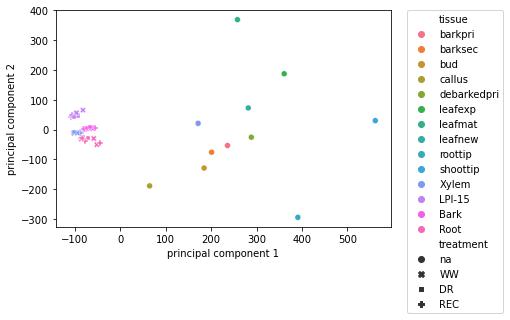

In [4]:
# visualize PCA result 
principalDf

principalDf['tissue'] = tissue_list
sample2treatment = exp_design[
    [
        'File',
        'Group'
    ]
].set_index('File').to_dict('dict')['Group']

treatment_list = list(exp717m.index.map(sample2treatment))
# exp717m.index
subs = ['na']*11
for i in range(len(subs)):
    treatment_list[i] = subs[i]
principalDf['treatment'] = treatment_list
sns.scatterplot(
    data=principalDf,
    x='principal component 1',
    y='principal component 2',
    hue='tissue',
    style='treatment'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [5]:
%%time
# UMAP

import umap
reducer = umap.UMAP()
m717_data = exp717.values.transpose()
scaled_717_data = StandardScaler().fit_transform(m717_data)
embedding = reducer.fit_transform(scaled_717_data)
embedding.shape

CPU times: user 23.7 s, sys: 891 ms, total: 24.6 s
Wall time: 35 s


(47, 2)

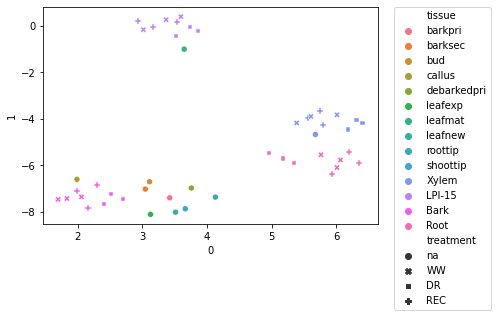

In [6]:
# visualize UMAP result
eb = pd.DataFrame(embedding)
eb['tissue'] = tissue_list
sample2treatment = exp_design[
    [
        'File',
        'Group'
    ]
].set_index('File').to_dict('dict')['Group']

treatment_list = list(exp717m.index.map(sample2treatment))
# exp717m.index
subs = ['na']*11
for i in range(len(subs)):
    treatment_list[i] = subs[i]
eb['treatment'] = treatment_list
sns.scatterplot(
    data=eb,
    x=0,
    y=1,
    hue='tissue',
    style='treatment'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)